In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import diff
from statsmodels.nonparametric.smoothers_lowess import lowess
import math

In [167]:
import glob

txtfiles = []
for file in glob.glob("Leverage Files/*_Shock Compression.txt"):
    txtfiles.append(file)
print(txtfiles)

['Leverage Files\\Ibis Ripmo 29 2019_Shock Compression.txt', 'Leverage Files\\Specilaized Turbo Levo_Shock Compression.txt', 'Leverage Files\\TransitionPatrol_Shock Compression.txt']


In [177]:
file = txtfiles[2]
bike = {
    
        'Ratio' : np.array(pd.read_csv(f'{file}', usecols=[2], delim_whitespace=' ')),
        'Position' : np.array(pd.read_csv(f'{file}', usecols=[0], delim_whitespace=' ')),
        'Shock' : np.array(pd.read_csv(f'{file}', usecols=[1], delim_whitespace=' '))
        }
    



In [178]:

position = bike['Position'].reshape(-1,)
shock = bike['Shock'].reshape(-1,)
ratio = 1/bike['Ratio'].reshape(-1,)
pro = int((((ratio[0]/ratio[-1])-1)*100)) #calculate progression from beginning to end
riderweight=72 #kg
bikeweight=25 #kg
weightbalance=0.6 #%of weight on rear wheel
rearweight = (riderweight + (bikeweight*0.8)) * weightbalance #rear sprung weight
travel = position[-1] #bike travel
stroke = 52.5 #shock[-1] #shock stroke
dampingratio = 0.1 #LSR 0.45, HSR 0.3
spring = 450 #lb/in

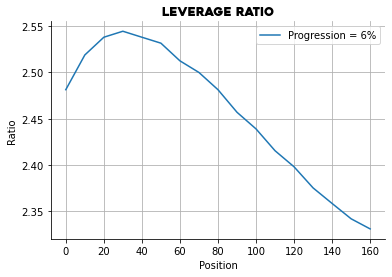

Progression = 6 %


In [179]:
plt.plot(position, ratio, label =f'Progression = {pro}%')
plt.title("Leverage Ratio", fontname='Heavitas')
plt.ylabel("Ratio")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
plt.legend()
#plt.savefig('.png')
plt.show()

print("Progression =", pro,"%")

In [180]:

mspring = spring * 0.175 #covert to N/mm
Force =[]

for x in shock:      #changes spring force to wheel force
    f = mspring * x
    Force.append(f)
wheel = Force / ratio

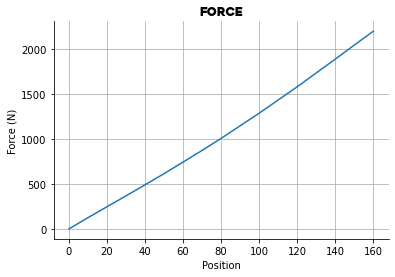

In [181]:
plt.plot(position, wheel)
plt.title("Force", fontname='Heavitas')
plt.ylabel("Force (N)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.show()

In [182]:
n =  (rearweight*9.81) #weight on wheel in N
sag = np.round(np.interp(n, wheel, position),0)
sagpc = np.round((sag/travel)*100, 0)               
print(sag,"mm")
print(sagpc,"%")#sag at the wheel

44.0 mm
28.0 %


In [183]:
sagratio = np.round(np.interp(sag, position, ratio))
shocksag = sag/sagratio
shocksagpc = (shocksag/stroke)*100
print(shocksagpc)

27.936507936507937


In [184]:
g=np.round((wheel[-1]/9.81)/rearweight,1) #number of g's to bottom out
print(g,"g")

4.1 g


In [185]:
work=np.round(np.trapz(wheel, position/1000)) #trapezoidal integration to calculate work 
print(work,"J")

167.0 J


In [186]:
Rate = diff(wheel)/diff(position)
filtered = lowess(Rate, position[1:], frac=0.3, it=0)


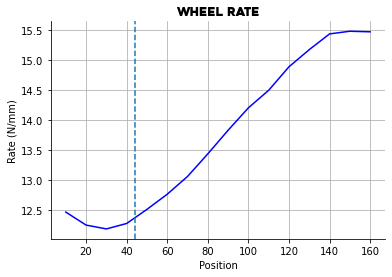

In [187]:
filteredrate = (filtered[:,1]).reshape(-1,)
filteredposition = (filtered[:,0]).reshape(-1,)
plt.plot(filteredposition, filteredrate, 'b')
plt.title("Wheel Rate", fontname='Heavitas')
plt.ylabel("Rate (N/mm)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
#plt.ylim(10,14)
#plt.legend()
#plt.savefig('.png')
plt.show()

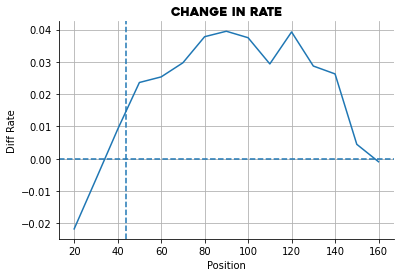

0.02009043978431239


In [188]:
ratechange = diff(filteredrate)/diff(filteredposition)
plt.plot(filteredposition[1:], ratechange)
plt.title("Change in Rate", fontname='Heavitas')
plt.ylabel("Diff Rate")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axhline(y=0, ls='--')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.show()
print(np.mean(ratechange))

In [189]:
def natural_frequency(k, m) :
    Wo = math.sqrt(k/m)
    return Wo

In [190]:
freq = []
Fn = []
for x in filteredrate:
    b = natural_frequency((x*1000), rearweight)
    freq.append(b)
    Fn.append(b/6.28)
    
print(freq, Fn)
    

[15.026163893434212, 14.894520399784323, 14.855567782321645, 14.910881413095815, 15.053555000798438, 15.205199980638065, 15.381079292276542, 15.601983369787732, 15.829472561837827, 16.042418298436132, 16.20730982286977, 16.42521721524209, 16.582729121669576, 16.725530276743427, 16.749629424890358, 16.744527097614913] [2.3927012569162756, 2.3717389171631087, 2.3655362710703254, 2.374344174059843, 2.3970628982163116, 2.4212101879996917, 2.449216447814736, 2.4843922563356258, 2.5206166499741762, 2.554525206757346, 2.5807818189283074, 2.6154804482869567, 2.6405619620492953, 2.663300999481437, 2.6671384434538785, 2.6663259709577884]


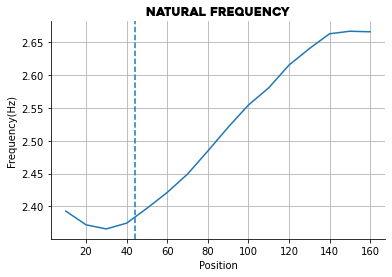

In [191]:
plt.plot(position[1:], Fn)
plt.title("Natural Frequency", fontname='Heavitas')
plt.ylabel("Frequency(Hz)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
plt.show()

In [192]:


def dampingrate(f, m, r):
    damping = 2 * r * f * m #natural freq in rad/s x weight x damping ratio
    return damping
    

In [193]:
damprate=[]
for f in freq:
    rate = dampingrate(f, rearweight, dampingratio)
    damprate.append(rate)
    
print(damprate) # in N/m/s

[165.8888493835137, 164.4355052136189, 164.00546831683096, 164.6161308005778, 166.19124720881476, 167.86540778624425, 169.80711538673302, 172.24589640245657, 174.7573770826896, 177.1082980147349, 178.92870044448225, 181.33439805627265, 183.07332950323212, 184.64985425524742, 184.91590885078955, 184.85957915766863]


In [194]:
shockdampingrate = damprate*(ratio[1:]**2) #N/m/s

In [195]:
print(shockdampingrate)

[1052.53411533 1059.26141625 1061.87458848 1060.42497102 1065.15780938
 1059.72960144 1061.29447117 1060.56866554 1054.98600706 1053.58892335
 1043.94910292 1042.81695827 1032.90620964 1027.11070585 1014.18813711
 1004.44780868]
